In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
import seaborn as sns


pyber_ride = pd.read_csv("Raw_data/ride_data.csv")
pyber_city = pd.read_csv("Raw_data/city_data.csv")

#pyber_city #city, driver_count,type
#pyber_ride #city, date, fare, ride_id

In [2]:
pyber_data = pd.merge(pyber_city, pyber_ride, on='city', how='outer')
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [3]:

pyber_data = pyber_data.groupby('city')
city_ride_count = pyber_data['type'].count()
city_fare_sum = pyber_data['fare'].sum()
city_avg_fare = city_fare_sum/city_ride_count
driver_count = pyber_data['driver_count'].first()
city_type = pyber_data['type'].first()
city_summary = pd.DataFrame({'Ride Count':city_ride_count,
                             'Avg Fare':city_avg_fare,
                             'Driver Count':driver_count,
                             'Type':city_type,
                             'Total Fare':city_fare_sum})

city_summary.head()

,Avg Fare,Driver Count,Ride Count,Total Fare,Type
city,,,,,
Alvarezhaven,23.928710,21,31,741.79,Urban
Alyssaberg,20.609615,67,26,535.85,Urban
Anitamouth,37.315556,16,9,335.84,Suburban
Antoniomouth,23.625000,21,22,519.75,Urban
Aprilchester,21.981579,49,19,417.65,Urban


In [4]:
urban_df = city_summary.loc[city_summary['Type']=='Urban']
urban_df.head()

,Avg Fare,Driver Count,Ride Count,Total Fare,Type
city,,,,,
Alvarezhaven,23.928710,21,31,741.79,Urban
Alyssaberg,20.609615,67,26,535.85,Urban
Antoniomouth,23.625000,21,22,519.75,Urban
Aprilchester,21.981579,49,19,417.65,Urban
Arnoldview,25.106452,41,31,778.30,Urban


In [5]:
suburban_df = city_summary.loc[city_summary['Type']=='Suburban']
suburban_df.head()

,Avg Fare,Driver Count,Ride Count,Total Fare,Type
city,,,,,
Anitamouth,37.315556,16,9,335.84,Suburban
Campbellport,33.711333,26,15,505.67,Suburban
Carrollbury,36.606000,4,10,366.06,Suburban
Clarkstad,31.051667,21,12,372.62,Suburban
Conwaymouth,34.591818,18,11,380.51,Suburban


In [6]:
rural_df = city_summary.loc[city_summary['Type']=='Rural']
rural_df.head()

,Avg Fare,Driver Count,Ride Count,Total Fare,Type
city,,,,,
East Leslie,33.660909,9,11,370.27,Rural
East Stephen,39.053000,6,10,390.53,Rural
East Troybury,33.244286,3,7,232.71,Rural
Erikport,30.043750,3,8,240.35,Rural
Hernandezshire,32.002222,10,9,288.02,Rural


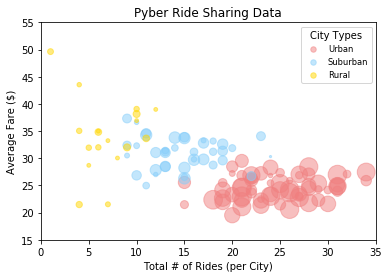

In [7]:
colors = ['Gold', 'LightSkyBlue','LightCoral']
urban=plt.scatter(urban_df['Ride Count'], urban_df['Avg Fare'],
            marker='o',
            sizes=(urban_df["Driver Count"])*5, alpha = 0.50,label="Urban",color="LightCoral")

suburban =plt.scatter(suburban_df['Ride Count'], suburban_df['Avg Fare'],
            marker='o',
            sizes=(suburban_df["Driver Count"])*5, alpha = 0.50, label="Suburban",color='LightSkyBlue',)

rural=plt.scatter(rural_df['Ride Count'], rural_df['Avg Fare'],
            marker='o',
            sizes=(rural_df["Driver Count"])*5, alpha = 0.50,label="Rural", color='Gold')

plt.xlabel('Total # of Rides (per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data')

plt.xlim(0, 35)
plt.ylim(15, 55)

lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.show()

In [8]:
total_fare = city_summary.groupby('Type')["Total Fare"].sum().reset_index()
total_fare

,Type,Total Fare
0,Rural,4255.09
1,Suburban,20335.69
2,Urban,40078.34


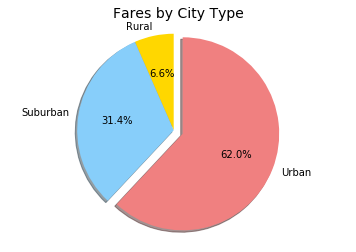

In [9]:
colors = ['Gold', 'LightSkyBlue','LightCoral']
fig1, ax1 = plt.subplots()
ax1.pie(total_fare["Total Fare"], labels = total_fare['Type'], shadow = True, explode = (0,0,0.1), 
        colors=colors,startangle=90, autopct = "%1.1f%%",)
ax1.axis('equal')
plt.title('Fares by City Type', fontsize = 14).axes.get_yaxis().set_visible(False)
plt.show()

In [10]:
total_rides = city_summary.groupby('Type')["Ride Count"].sum().reset_index()
total_rides

,Type,Ride Count
0,Rural,125
1,Suburban,657
2,Urban,1625


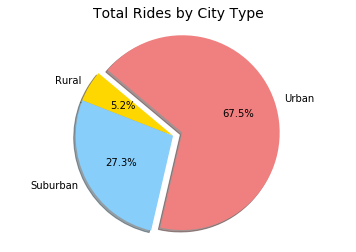

In [11]:
fig1, ax1 = plt.subplots()
ax1.pie(total_rides["Ride Count"], labels = total_rides["Type"], shadow = True, explode = (0,0,0.1), colors=colors,
        startangle=140, autopct = "%1.1f%%",)
ax1.axis('equal')
plt.title('Total Rides by City Type', fontsize = 14).axes.get_yaxis().set_visible(False)
plt.show()

In [12]:

total_drivers  = city_summary.groupby('Type')["Ride Count"].sum().reset_index()
total_drivers

,Type,Ride Count
0,Rural,125
1,Suburban,657
2,Urban,1625


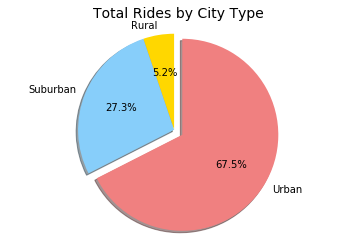

In [13]:
fig1, ax1 = plt.subplots()
ax1.pie(total_drivers["Ride Count"], labels = total_drivers["Type"], shadow = True, explode = (0,0,0.1), 
        colors=colors,startangle=90, autopct = "%1.1f%%",)
ax1.axis('equal')
plt.title('Total Rides by City Type', fontsize = 14).axes.get_yaxis().set_visible(False)
plt.show()